# Student grades prediction

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('Student_Grades_Prediction.csv')
# df	Seat No.	PH-121	HS-101	CY-105	HS-105/12	MT-111	CS-105	CS-106	EL-102	EE-119	...	CS-312	CS-317	CS-403	CS-421	CS-406	CS-414	CS-419	CS-423	CS-412	CGPA
# 0	CS-97001	B-	D+	C-	C	C-	D+	D	C-	B-	...	C-

In [3]:
# checking the unique values of the dataset so that we can covert all the cols into numeric values
for i in df.columns:
    print(df[i].unique())

['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043' 'CS-97044' 'CS-97045' 'CS-97046' 'CS-97047' 'CS-97048'
 'CS-97049' 'CS-97050' 'CS-97051' 'CS-97052' 'CS-97053' 'CS-97054'
 'CS-97055' 'CS-97056' 'CS-97057' 'CS-97058' 'CS-97059' 'CS-97060'
 'CS-97061' 'CS-97062' 'CS-97063' 'CS-97064' 'CS-97065' 'CS-97066'
 'CS-97067' 'CS-97068' 'CS-97069' 'CS-97070' 'CS-97071' 'CS-97072'
 'CS-97073' 'CS-97074' 'CS-97075' 'CS-97076' 'CS-97077' 'CS-97078'
 'CS-97079' 'CS-97080' 'CS-97081' 'CS-97082' 'CS-97083' 'CS-97084'
 'CS-97085' 'CS-97086' 'CS-97087' 'CS-97088' 'CS-97089' 'CS-97

In [4]:
# checking the data using head() function
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
# checking the null values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
# dropping the col 'Seat No.' since it won't be helpful to our model
df.drop('Seat No.', axis = 1, inplace = True)

In [7]:
# mapping the grade values based on normal universities grading system
mapping = {'A+': 4.3,'A': 4.0,'A-': 3.7,'B+': 3.3,'B': 3.0,'B-': 2.7,'C+': 2.3,'C': 2.0,'C-': 1.7,'D+': 1.3,'D': 1.0,'F': 0.0,'WU': 0.0,'W': 0.0}

In [8]:
# now mapping these values directly into the df
for i in df.columns:
    if i != 'CGPA':
        df[i] = df[i].map(mapping)

In [9]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.3,4.0,3.7,3.7,4.3,3.3,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,4.3,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [10]:
# filling the null values using the mean()
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

In [11]:
# rechecking the null values
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [12]:
# checking the unique values
for i in df.columns:
    print(df[i].unique())

[2.7 4.  1.  3.7 3.3 3.  2.3 2.  1.7 1.3 0.  4.3]
[1.3 1.  3.  2.3 3.7 2.7 1.7 3.3 2.  4.  4.3 0. ]
[1.7        1.3        4.         3.7        3.         2.3
 3.3        2.7        2.         1.         3.27052632 0.
 4.3       ]
[2.         1.         2.7        3.3        1.3        3.
 1.7        2.3        3.7        4.         2.87684211 0.
 4.3       ]
[1.7        2.7        3.3        1.         4.         2.3
 3.7        2.         3.         1.3        2.99033392 4.3
 0.        ]
[1.3 2.  4.  3.7 3.  2.7 3.3 2.3 1.7 4.3 1. ]
[1.         2.7        1.3        3.7        2.3        4.
 1.7        2.         3.         3.3        2.94446397 4.3
 0.        ]
[1.7        4.         3.3        3.         3.7        2.7
 2.         2.3        1.3        1.         2.97328647 4.3
 0.        ]
[2.7        1.3        3.7        1.         4.         3.3
 3.         1.7        2.3        2.         0.         3.00808436
 4.3       ]
[1.7        1.         3.7        2.3        3.3     

In [13]:
# checking the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [14]:
# checking the correlation
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.411048,0.629940,0.553514,0.501448,0.673091,0.313291,0.435432,0.657363,0.574290,...,0.042862,0.492483,0.369502,0.361121,0.351456,0.211044,0.483047,0.119646,0.345144,0.681103
HS-101,0.411048,1.000000,0.362250,0.491309,0.463858,0.445579,0.364858,0.377251,0.321171,0.363111,...,0.252031,0.412721,0.267458,0.350935,0.310507,0.283517,0.305833,0.259212,0.294484,0.562773
CY-105,0.629940,0.362250,1.000000,0.586634,0.583161,0.621155,0.412690,0.489610,0.546033,0.482832,...,0.279219,0.487733,0.521295,0.397826,0.185028,0.097060,0.474594,0.156147,0.121016,0.686595
HS-105/12,0.553514,0.491309,0.586634,1.000000,0.530553,0.544894,0.531397,0.378336,0.462627,0.386269,...,0.307285,0.506159,0.523988,0.454090,0.221453,0.158837,0.505486,0.264296,0.192779,0.662112
MT-111,0.501448,0.463858,0.583161,0.530553,1.000000,0.443430,0.551887,0.575614,0.450610,0.495382,...,0.508461,0.578326,0.453176,0.548587,0.281917,0.267002,0.538962,0.416395,0.283614,0.758216
CS-105,0.673091,0.445579,0.621155,0.544894,0.443430,1.000000,0.306558,0.373838,0.593594,0.502323,...,0.081056,0.414765,0.322074,0.309085,0.320560,0.185572,0.367370,0.090377,0.262999,0.642632
CS-106,0.313291,0.364858,0.412690,0.531397,0.551887,0.306558,1.000000,0.362601,0.281823,0.317061,...,0.504806,0.423417,0.494248,0.425743,0.134619,0.131474,0.473832,0.384624,0.153490,0.580217
EL-102,0.435432,0.377251,0.489610,0.378336,0.575614,0.373838,0.362601,1.000000,0.439374,0.469325,...,0.360725,0.471707,0.338813,0.392428,0.259536,0.305262,0.386051,0.384728,0.274576,0.654795
EE-119,0.657363,0.321171,0.546033,0.462627,0.450610,0.593594,0.281823,0.439374,1.000000,0.614705,...,0.175170,0.477854,0.392322,0.405283,0.332682,0.249478,0.498109,0.258070,0.351041,0.674196
ME-107,0.574290,0.363111,0.482832,0.386269,0.495382,0.502323,0.317061,0.469325,0.614705,1.000000,...,0.241521,0.486741,0.376883,0.420789,0.333794,0.199885,0.485217,0.254897,0.320817,0.692117


In [15]:
# checking the stats 
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.009982,2.605604,3.270526,2.876842,2.990334,3.334676,2.944464,2.973286,3.008084,2.687346,...,2.970232,2.686225,3.119678,2.476565,3.241358,3.423656,3.007885,2.956014,3.222561,2.954888
std,0.991555,0.914812,0.945520,1.040980,0.958724,0.833502,0.860768,0.990068,0.833217,1.025935,...,1.094911,0.882902,0.867891,0.906742,0.786329,0.780787,0.740703,0.882513,0.741690,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.300000,2.000000,2.850000,2.000000,2.300000,3.000000,2.700000,2.300000,2.300000,1.700000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.150000,2.700000,2.300000,3.000000,2.538000
50%,3.300000,2.700000,3.700000,3.000000,3.300000,3.700000,3.000000,3.300000,3.300000,2.700000,...,3.000000,2.700000,3.300000,2.700000,3.300000,3.700000,3.000000,3.000000,3.300000,3.029000
75%,3.700000,3.300000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.300000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.451000
max,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,...,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,3.985000


In [16]:
# lets check the skewness of the data
df.skew()

PH-121      -0.804286
HS-101      -0.193172
CY-105      -1.297833
HS-105/12   -0.491622
MT-111      -0.742513
CS-105      -1.139794
CS-106      -0.912500
EL-102      -0.726280
EE-119      -0.734623
ME-107      -0.330661
CS-107      -0.538210
HS-205/20   -1.405674
MT-222      -0.333757
EE-222      -1.027742
MT-224      -0.608981
CS-210      -1.007215
CS-211      -0.242276
CS-203      -0.439416
CS-214      -0.073478
EE-217      -0.962676
CS-212      -0.572898
CS-215      -0.285664
MT-331      -0.833173
EF-303      -0.328771
HS-304      -0.757237
CS-301      -0.579166
CS-302      -0.885372
TC-383      -0.435709
MT-442      -1.123352
EL-332      -0.737153
CS-318      -0.595528
CS-306      -0.715521
CS-312      -0.401980
CS-317      -0.356350
CS-403      -0.717568
CS-421      -0.513389
CS-406      -1.906517
CS-414      -2.007038
CS-419      -0.776527
CS-423      -0.805161
CS-412      -1.893843
CGPA        -0.497203
dtype: float64

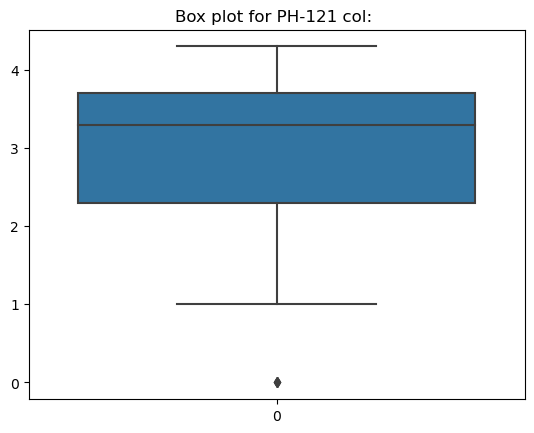

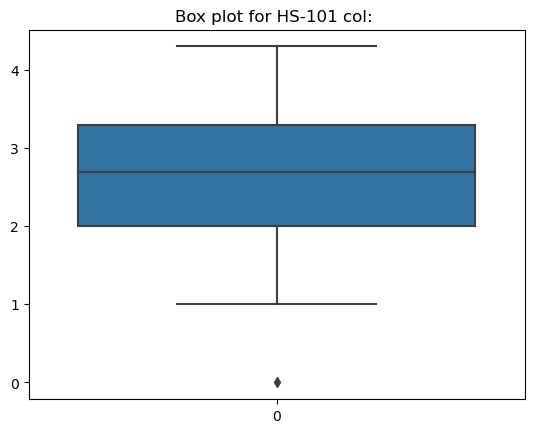

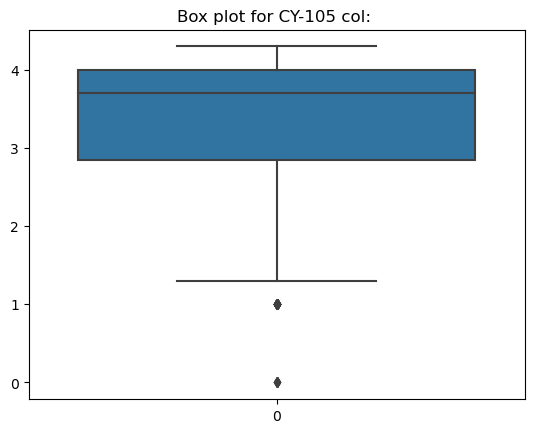

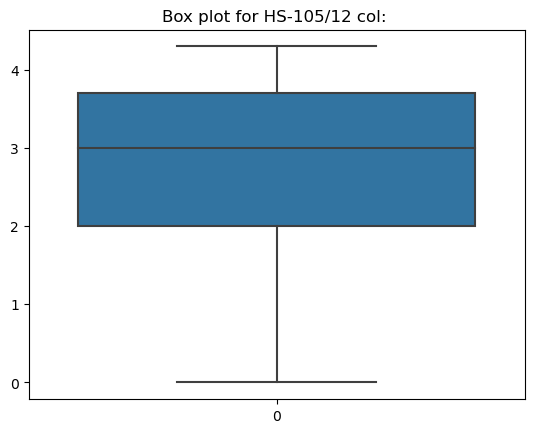

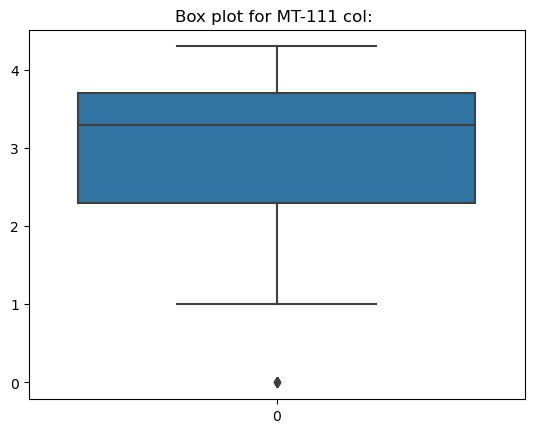

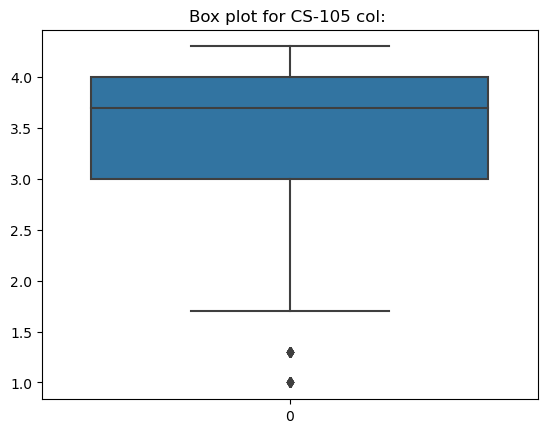

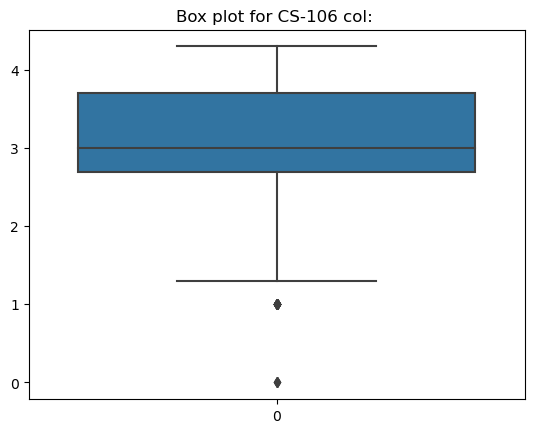

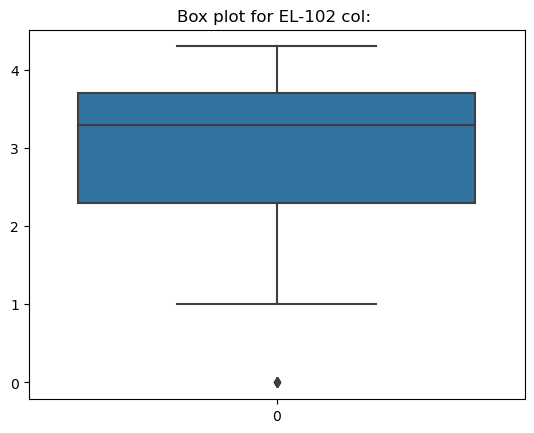

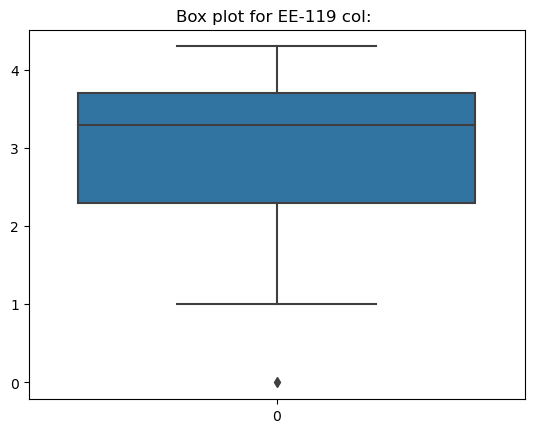

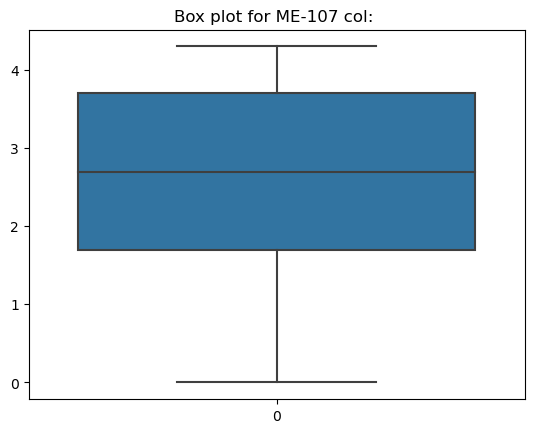

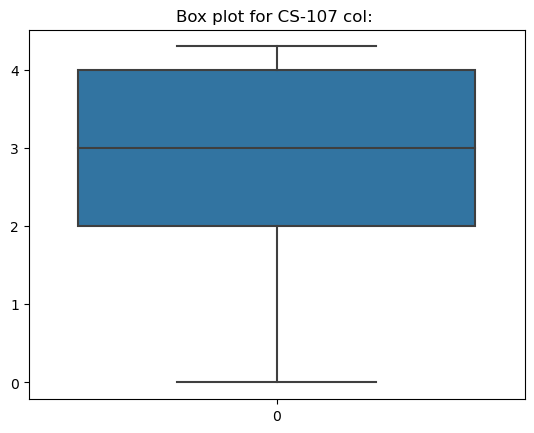

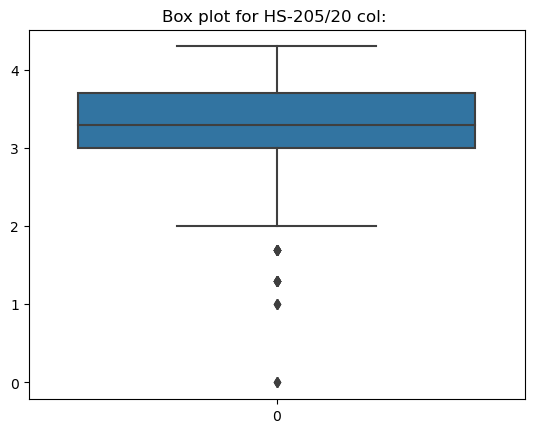

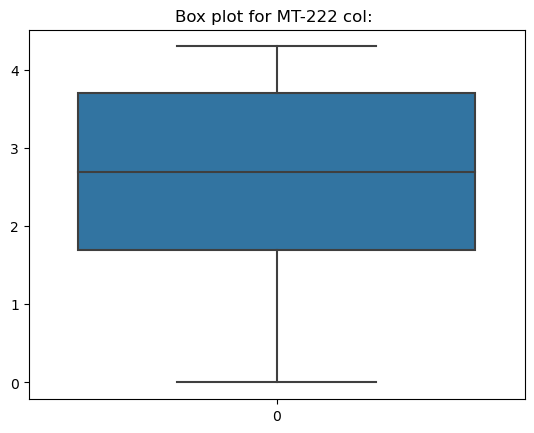

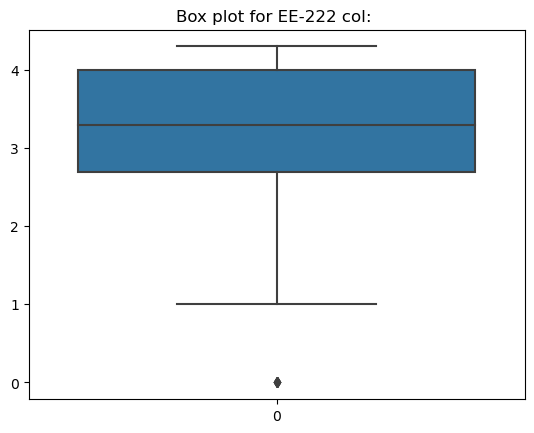

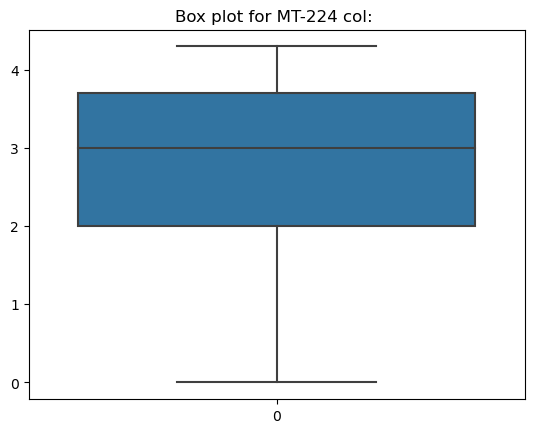

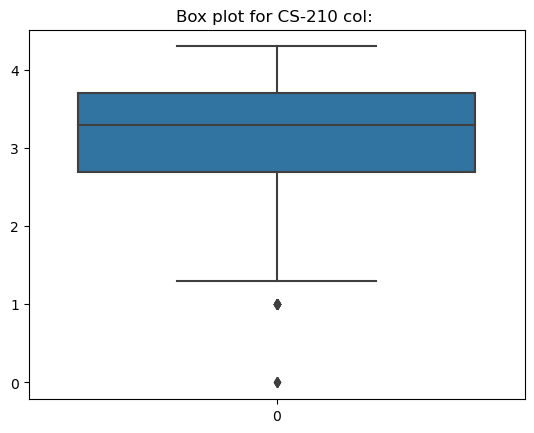

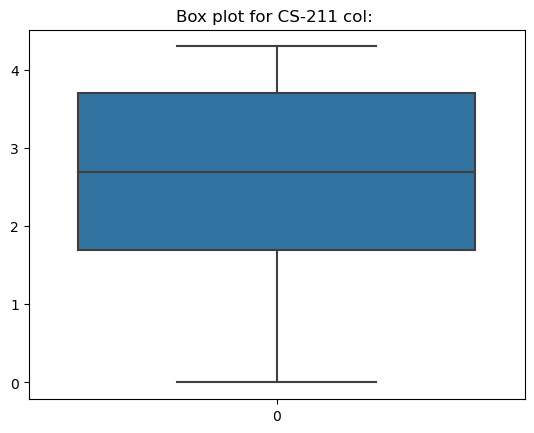

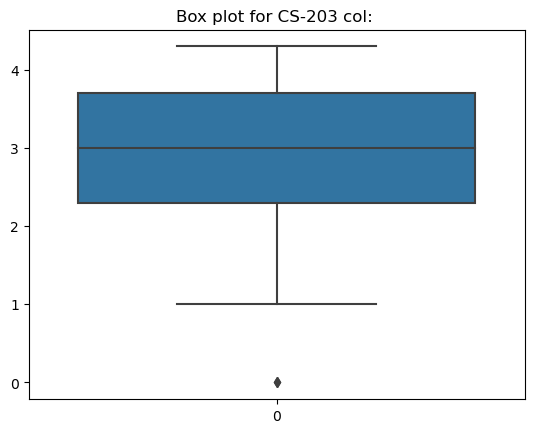

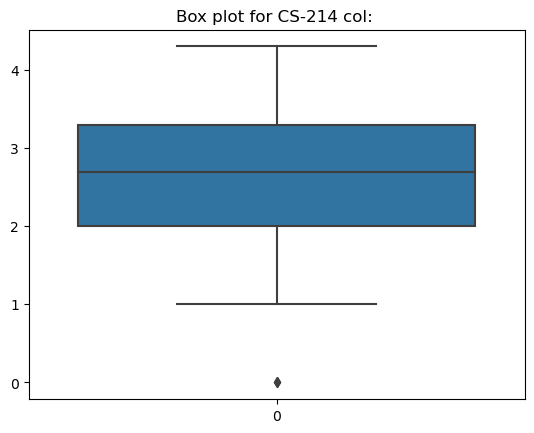

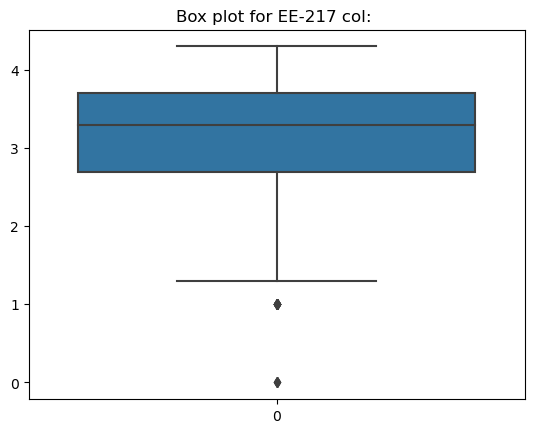

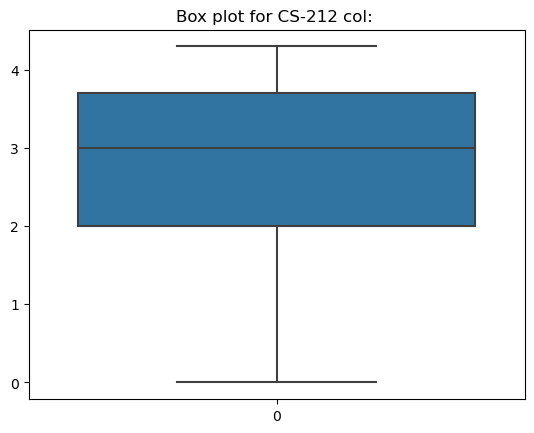

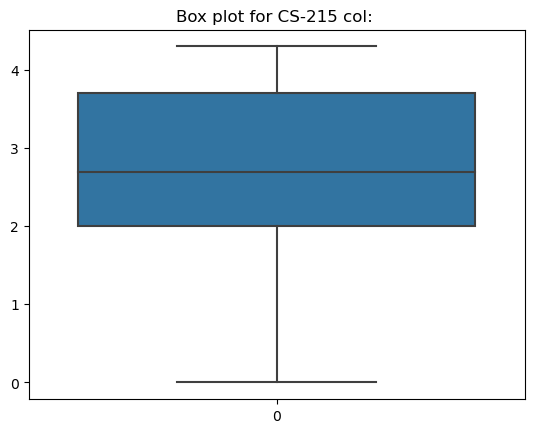

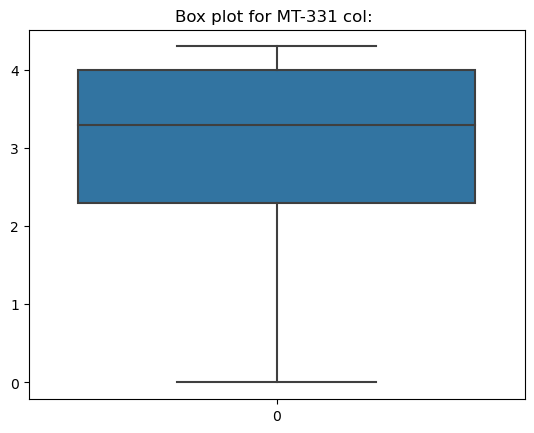

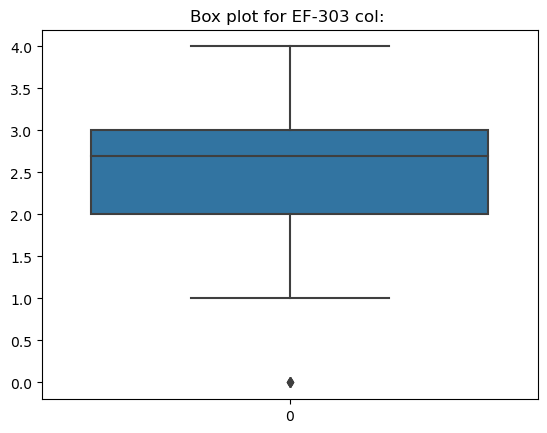

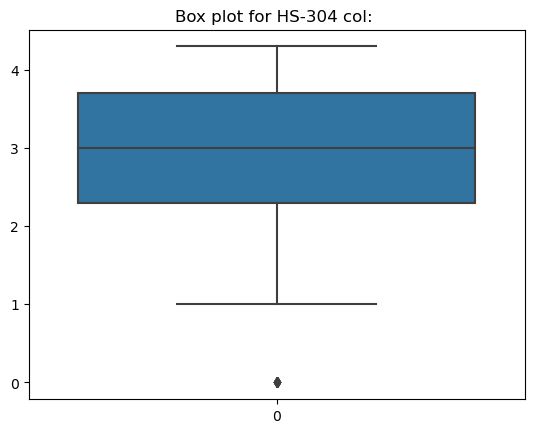

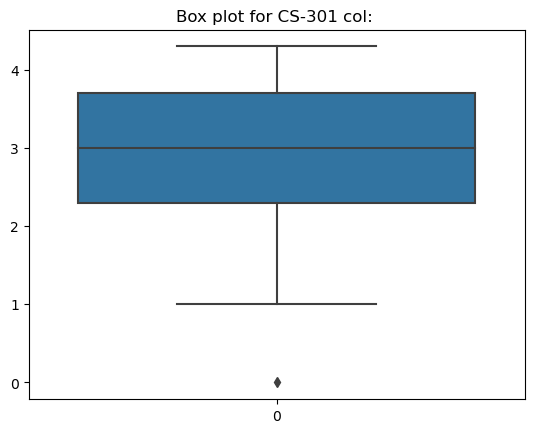

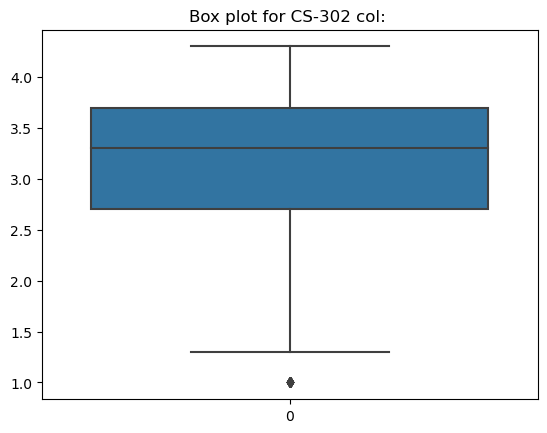

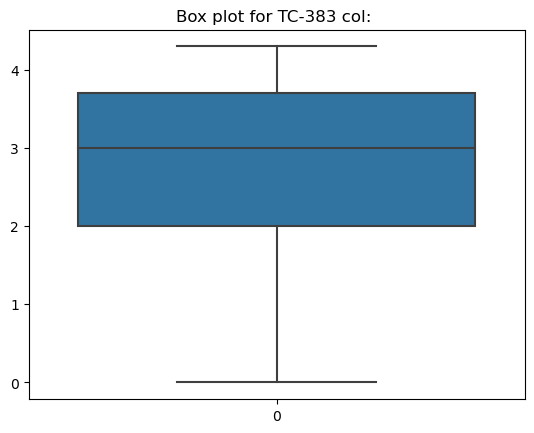

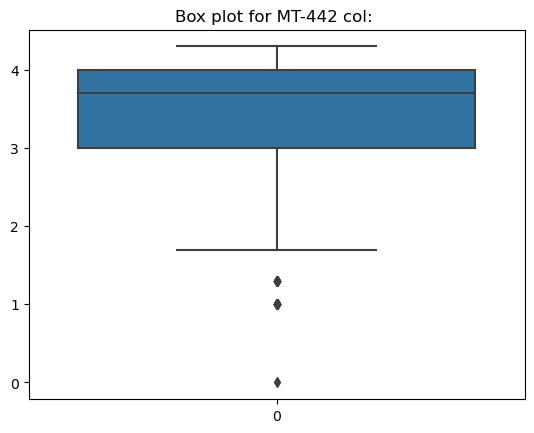

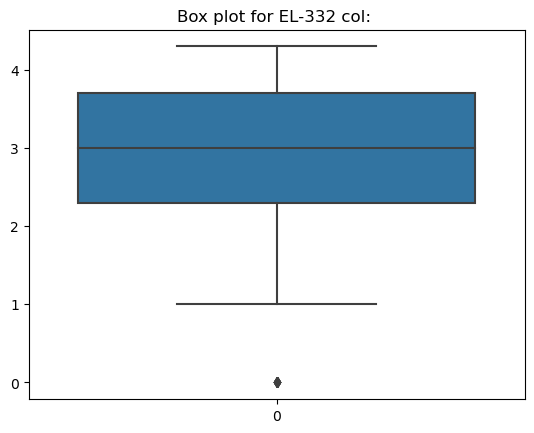

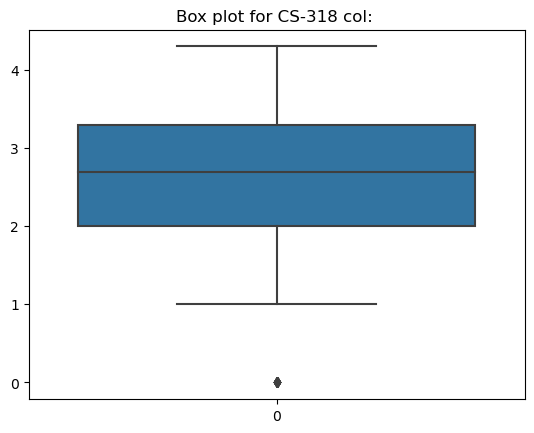

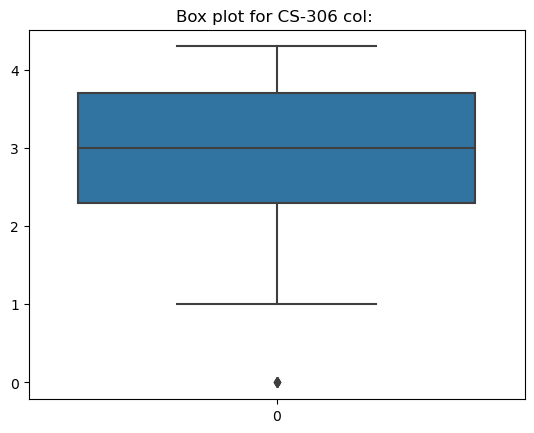

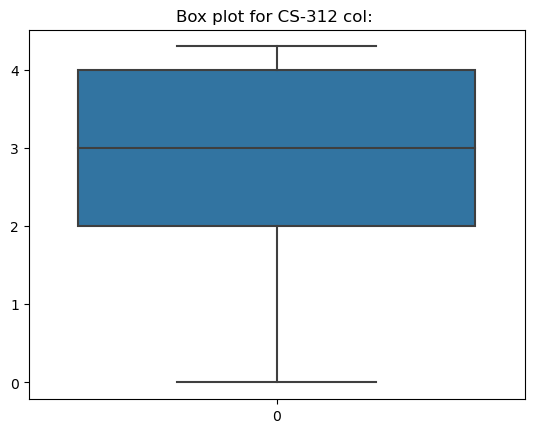

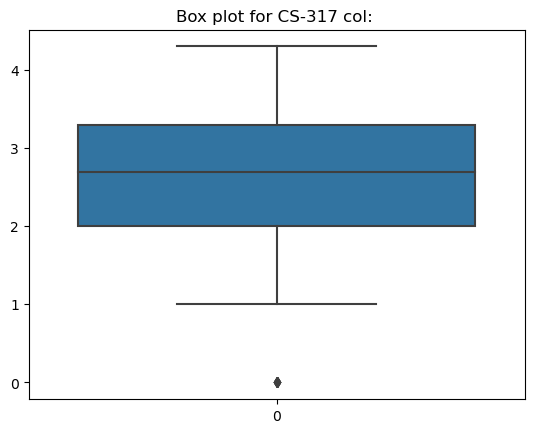

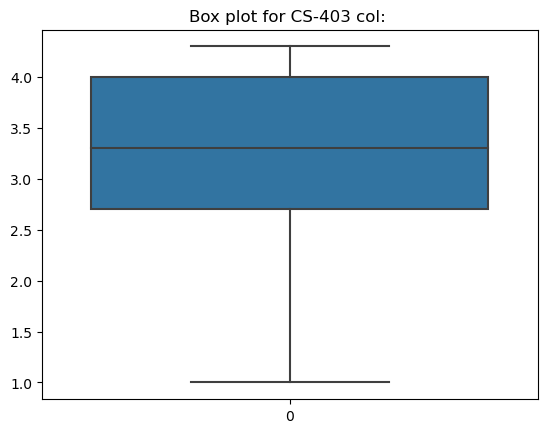

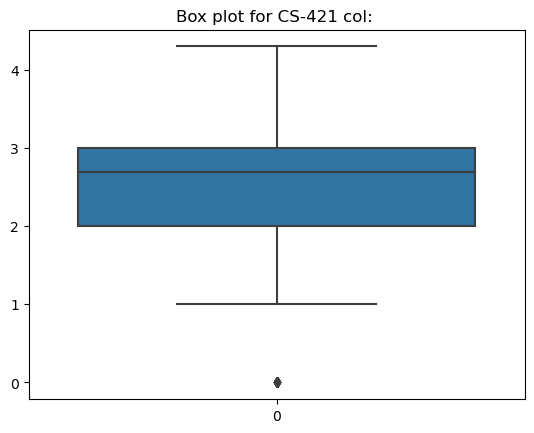

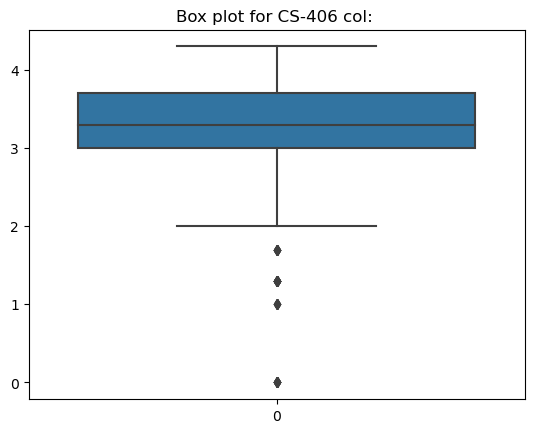

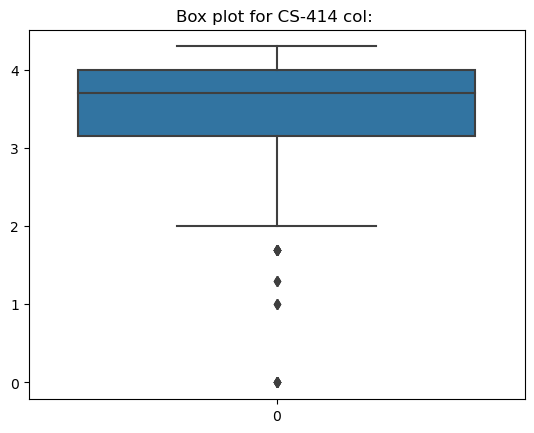

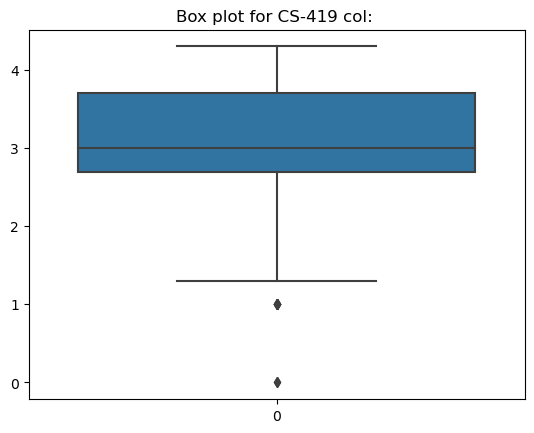

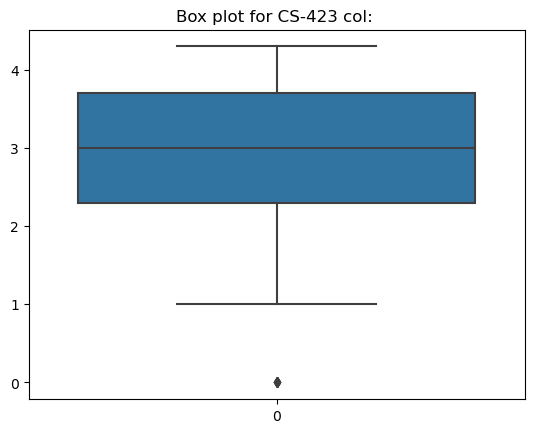

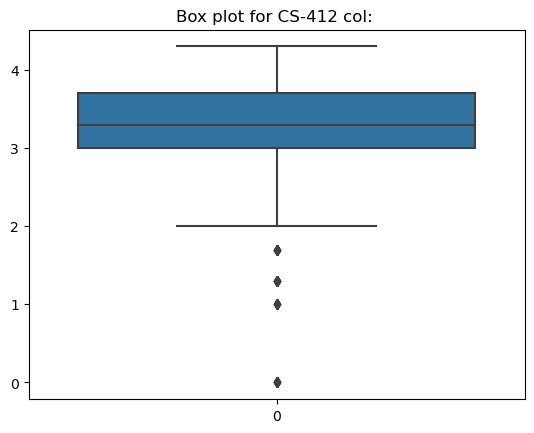

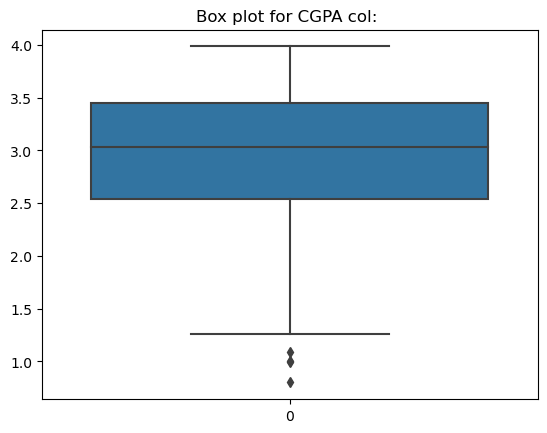

In [17]:
# checking for outliers using box plot
for i in df.columns:
    plt.title(f"Box plot for {i} col: ")
    sns.boxplot(df[i])
    plt.show()

## Removing the outliers using IQR (interquartile) method

### for 'HS-205/20', 'MT-442', 'CS-414', 'CS-412' cols

In [18]:
# finding the 25th and 75th percentile of all the cols

# for 'HS-205/20' col
hs25 = df['HS-205/20'].quantile(.25)
hs75 = df['HS-205/20'].quantile(.75)

# for 'MT-442' col
mt25 = df['MT-442'].quantile(.25)
mt75 = df['MT-442'].quantile(.75)

# for 'CS-414' col
cs414_25 = df['CS-414'].quantile(.25)
cs414_75 = df['CS-414'].quantile(.75)

# for 'CS-412' col
cs412_25 = df['CS-412'].quantile(.25)
cs412_75 = df['CS-412'].quantile(.75)

print(hs25)
print(hs75)
print(mt25)
print(mt75)
print(cs414_25)
print(cs414_75)
print(cs412_25)
print(cs412_75)

3.0
3.7
3.0
4.0
3.15
4.0
3.0
3.7


In [19]:
# finding IQR for all the cols

# for 'HS-205/20' col
hs_iqr = hs75 - hs25

# for 'MT-442' col
mt_iqr = mt75 - mt25

# for 'CS-414' col
cs414_iqr = cs414_75 - cs414_25

# for 'CS-412' col
cs412_iqr = cs412_75 - cs412_25

In [20]:
# finding the upper and lower limit of all cols for capping those

# for 'HS-205/20' col
hs_upper = hs75 + 1.5 * hs_iqr
hs_lower = hs25 - 1.5 * hs_iqr

# for 'MT-442' col
mt_upper = mt75 + 1.5 * mt_iqr
mt_lower = mt25 - 1.5 * mt_iqr

# for 'CS-414' col
cs1_upper = cs414_75 + 1.5 * cs414_iqr
cs1_lower = cs414_25 - 1.5 * cs414_iqr

# for 'CS-412' col
cs2_upper = cs412_75 + 1.5 * cs412_iqr
cs2_lower = cs412_25 - 1.5 * cs412_iqr

### Capping all the cols for removing outliers

In [21]:
# for 'HS-205/20' col
df['HS-205/20'] = np.where(
    df['HS-205/20'] > hs_upper, hs_upper,
    np.where(
        df['HS-205/20'] < hs_lower, hs_lower,
        df['HS-205/20']
    )
)

# for 'MT-442' col
df['MT-442'] = np.where(
    df['MT-442'] > mt_upper, mt_upper,
    np.where(
        df['MT-442'] < mt_lower, mt_lower,
        df['MT-442']
    )
)

# for 'CS-414' col
df['CS-414'] = np.where(
    df['CS-414'] > cs1_upper, cs1_upper,
    np.where(
        df['CS-414'] < cs1_lower, cs1_lower,
        df['CS-414']
    )
)

# for 'CS-412' col
df['CS-412'] = np.where(
    df['CS-412'] > cs2_upper, cs2_upper,
    np.where(
        df['CS-412'] < cs2_lower, cs2_lower,
        df['CS-412']
    )
)

<Axes: >

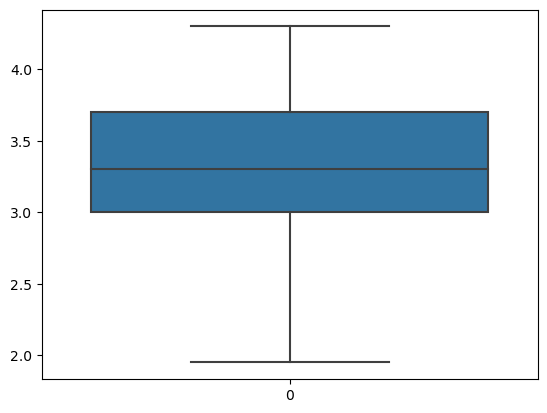

In [22]:
# now rechecking the outliers in these cols 
sns.boxplot(df['HS-205/20'])

<Axes: >

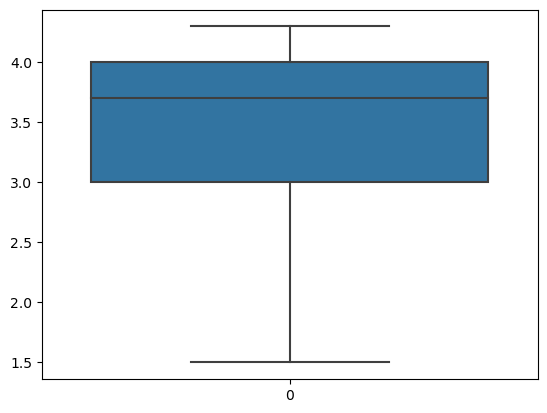

In [23]:
sns.boxplot(df['MT-442'])

<Axes: >

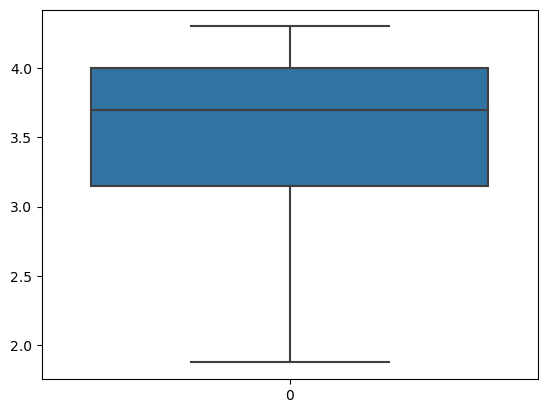

In [24]:
sns.boxplot(df['CS-414'])

<Axes: >

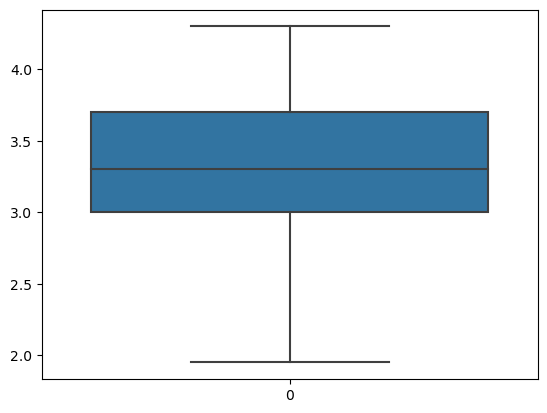

In [25]:
sns.boxplot(df['CS-412'])

In [26]:
df.skew()

PH-121      -0.804286
HS-101      -0.193172
CY-105      -1.297833
HS-105/12   -0.491622
MT-111      -0.742513
CS-105      -1.139794
CS-106      -0.912500
EL-102      -0.726280
EE-119      -0.734623
ME-107      -0.330661
CS-107      -0.538210
HS-205/20   -0.742669
MT-222      -0.333757
EE-222      -1.027742
MT-224      -0.608981
CS-210      -1.007215
CS-211      -0.242276
CS-203      -0.439416
CS-214      -0.073478
EE-217      -0.962676
CS-212      -0.572898
CS-215      -0.285664
MT-331      -0.833173
EF-303      -0.328771
HS-304      -0.757237
CS-301      -0.579166
CS-302      -0.885372
TC-383      -0.435709
MT-442      -0.912418
EL-332      -0.737153
CS-318      -0.595528
CS-306      -0.715521
CS-312      -0.401980
CS-317      -0.356350
CS-403      -0.717568
CS-421      -0.513389
CS-406      -1.906517
CS-414      -1.155391
CS-419      -0.776527
CS-423      -0.805161
CS-412      -0.800875
CGPA        -0.497203
dtype: float64

In [27]:
# reducing the skewness of only above 1 values since manipulating all the cols might cause negative impact on model
# by squaring or cubing the negative skewed values and taking cbrt of positive skewed values 
df['CY-105'] = df['CY-105'] ** 2
df['CS-210'] = df['CS-210'] ** 2
df['CS-406'] = df['CS-406'] ** 2
df['CS-105'] = df['CS-105'] ** 2
df['CS-414'] = df['CS-414'] ** 2


In [28]:
# rechecking the skewness
# I missed one while doing last operation
df['EE-222'] = df['EE-222'] ** 2
df.skew()

PH-121      -0.804286
HS-101      -0.193172
CY-105      -0.752781
HS-105/12   -0.491622
MT-111      -0.742513
CS-105      -0.676004
CS-106      -0.912500
EL-102      -0.726280
EE-119      -0.734623
ME-107      -0.330661
CS-107      -0.538210
HS-205/20   -0.742669
MT-222      -0.333757
EE-222      -0.451847
MT-224      -0.608981
CS-210      -0.424041
CS-211      -0.242276
CS-203      -0.439416
CS-214      -0.073478
EE-217      -0.962676
CS-212      -0.572898
CS-215      -0.285664
MT-331      -0.833173
EF-303      -0.328771
HS-304      -0.757237
CS-301      -0.579166
CS-302      -0.885372
TC-383      -0.435709
MT-442      -0.912418
EL-332      -0.737153
CS-318      -0.595528
CS-306      -0.715521
CS-312      -0.401980
CS-317      -0.356350
CS-403      -0.717568
CS-421      -0.513389
CS-406      -0.871099
CS-414      -0.829879
CS-419      -0.776527
CS-423      -0.805161
CS-412      -0.800875
CGPA        -0.497203
dtype: float64

In [29]:
# converting the 'CGPA' col into 'Grade' col for our model 
df['Grade'] = np.select([
    df['CGPA'] < 1.5,
    (df['CGPA'] >= 1.5) & (df['CGPA'] < 2.0),
    (df['CGPA'] >= 2.0) & (df['CGPA'] < 2.5),
    (df['CGPA'] >= 2.5) & (df['CGPA'] < 3.0),
    (df['CGPA'] >= 3.0) & (df['CGPA'] < 3.5),
    (df['CGPA'] >= 3.5) & (df['CGPA'] < 4.0),
    (df['CGPA'] >= 4.0) & (df['CGPA'] < 4.5),
    df['CGPA'] >= 4.5
], ['F', 'D+','C', 'C+','B', 'B+', 'A', 'A+'])

In [30]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Grade
0,2.7,1.3,2.89,2.0,1.7,1.69,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,13.69,16.000000,1.7,3.0,3.70,2.205,C
1,4.0,1.0,1.69,1.0,2.7,4.00,1.0,4.0,1.3,1.0,...,1.0,2.0,1.0,13.69,7.290000,2.0,2.0,3.00,2.008,C
2,4.0,3.0,16.00,2.7,3.3,16.00,2.7,3.3,3.7,3.7,...,3.0,4.0,2.0,16.00,16.000000,4.0,3.7,4.00,3.608,B+
3,1.0,2.3,1.69,1.0,1.0,13.69,1.3,1.7,1.0,2.3,...,2.0,1.3,1.7,7.29,9.000000,2.3,2.3,2.30,1.906,D+
4,3.7,3.7,13.69,3.3,4.0,16.00,3.7,3.3,4.0,3.7,...,3.3,3.3,2.7,13.69,16.000000,3.7,3.7,4.00,3.448,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,16.00,3.7,4.3,16.00,3.7,3.7,4.3,3.3,...,3.7,4.0,4.0,16.00,10.890000,3.3,3.0,4.00,3.798,B+
567,4.3,4.0,16.00,4.0,4.0,16.00,4.0,3.7,4.0,4.0,...,3.3,4.0,4.0,13.69,9.000000,3.7,2.0,3.70,3.772,B+
568,3.0,4.0,13.69,3.3,4.0,16.00,4.0,4.0,4.0,3.0,...,3.0,4.0,3.3,16.00,4.000000,3.3,3.7,3.70,3.470,B
569,4.0,3.3,1.00,4.0,1.0,1.69,2.7,1.7,2.7,1.7,...,3.0,3.0,1.7,1.00,4.000000,3.0,2.7,2.00,2.193,C


In [31]:
# now dropping the 'CGPA' col since we have converted out target col into 'Grade'
df.drop('CGPA', axis = 1, inplace = True)

## Creating the model

In [32]:
# creating the variable for storing input data
x = df.iloc[:,:-1]
x.head(2)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.3,2.89,2.0,1.7,1.69,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,13.69,16.00,1.7,3.0,3.7
1,4.0,1.0,1.69,1.0,2.7,4.00,1.0,4.0,1.3,1.0,...,1.0,1.3,1.0,2.0,1.0,13.69,7.29,2.0,2.0,3.0


In [33]:
# creating variable for target data
y = df.iloc[:,-1:]
y.head(2)

,Grade
0,C
1,C


In [34]:
# creating training and testing data using train_test_split method
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 46)

In [35]:
# checkning the shape of x_train, x_test, y_train and y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 41)
(172, 41)
(399, 1)
(172, 1)


### Trying Naive Bayes GaussianNB classifier

In [36]:
# calling the GaussianNB class
gnb = GaussianNB()
gnb

GaussianNB()

In [37]:
# training the model using fit model
gnb.fit(x_train, y_train)

GaussianNB()

In [38]:
# prediction variable
predgnb = gnb.predict(x_test)
predgnb

array(['C+', 'C+', 'C+', 'B', 'C+', 'B', 'B', 'B', 'C', 'C+', 'B', 'D+',
       'B+', 'C', 'C+', 'B', 'B', 'B+', 'C+', 'B', 'B+', 'B+', 'C+', 'B',
       'F', 'B+', 'B', 'C+', 'B+', 'B+', 'F', 'C+', 'B', 'D+', 'B+', 'C+',
       'C+', 'C', 'C', 'B+', 'B', 'B+', 'C+', 'B', 'C+', 'C+', 'B+', 'B',
       'C+', 'B+', 'C+', 'B', 'C', 'B+', 'C', 'B', 'B+', 'D+', 'B', 'C',
       'D+', 'C', 'C', 'C', 'B', 'B', 'C', 'B', 'B+', 'C', 'C+', 'B', 'C',
       'B', 'C', 'C+', 'B', 'B', 'D+', 'C+', 'B', 'C+', 'B+', 'B+', 'D+',
       'B+', 'C', 'B', 'B+', 'B', 'D+', 'C+', 'C+', 'C+', 'B+', 'B', 'C+',
       'B', 'D+', 'C+', 'B+', 'C', 'B+', 'C+', 'B', 'B+', 'D+', 'B', 'B+',
       'B', 'C+', 'B+', 'B+', 'B+', 'C', 'B', 'C+', 'C+', 'B+', 'B', 'C+',
       'C', 'B', 'C', 'B+', 'C', 'C', 'B+', 'F', 'C', 'F', 'C', 'C+', 'B',
       'D+', 'C', 'C+', 'B', 'B+', 'C+', 'B', 'C', 'C+', 'B', 'C+', 'C',
       'D+', 'B', 'B+', 'B+', 'C+', 'B', 'B', 'B', 'B', 'C+', 'C+', 'B+',
       'B', 'C+', 'B+', 'C+', 'B', 

In [39]:
# checking the accuracy score
print(accuracy_score(y_test, predgnb))

0.936046511627907


In [40]:
# checking confusion matrix
print(confusion_matrix(y_test, predgnb))

[[49  1  0  1  0  0]
 [ 1 34  0  0  0  0]
 [ 0  0 24  2  2  0]
 [ 1  0  2 39  0  0]
 [ 0  0  1  0 11  0]
 [ 0  0  0  0  0  4]]


In [41]:
# checking classification report
print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        51
          B+       0.97      0.97      0.97        35
           C       0.89      0.86      0.87        28
          C+       0.93      0.93      0.93        42
          D+       0.85      0.92      0.88        12
           F       1.00      1.00      1.00         4

    accuracy                           0.94       172
   macro avg       0.93      0.94      0.94       172
weighted avg       0.94      0.94      0.94       172



In [92]:
# creatin a function using the model by taking an example
def pred_gnb(a):
    a = a.reshape(1, -1)
    b = gnb.predict(a)
    print(b)
    if b == 'A+':
        print('Congratulations!!! You have got A+ grade')
    elif b == 'A':
        print('Congratulations!!! You have got A grade')
    elif b == 'B+':
        print('Congratulations!!! You have got B+ grade')
    elif b == 'B':
        print('Congratulations!!! You have got B grade')
    elif b == 'C+':
        print('Congratulations!!! You have got C+ grade')
    elif b == 'C':
        print('Congratulations!!! You have got C grade')
    elif b == 'D+':
        print('Congratulations!!! You have got D+ grade')
    elif b == 'F':
        print('Sorry to inform you, you have not try harder next time!!!')

In [82]:
# testing model by taking a sample from our dataset
a = np.array([3.7,3.7,16.0,4.0,4.3,16.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,16.0,4.0,18.49,4.0,4.3,4.0,4.3,4.3,4.0,4.0,3.7,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,4.0,4.0,4.0,3.3,16.0,16.0,4.0,3.7,4.0])
pred_gnb(a)

['B+']
Congratulations!!! You have got B+ grade


### Trying KNN 

In [42]:
# calling KNeighbors class
knn = KNeighborsClassifier()

In [43]:
# training the model using fit method
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
# prediction variable
predknn = knn.predict(x_test)
predknn

array(['C+', 'C+', 'C+', 'B', 'B', 'B', 'B', 'B+', 'C', 'C+', 'B', 'C',
       'B+', 'C', 'B', 'C+', 'B', 'B', 'C+', 'B', 'B+', 'B+', 'C+', 'B',
       'C', 'B+', 'B+', 'C+', 'B+', 'B+', 'D+', 'B', 'B', 'D+', 'B+',
       'C+', 'C+', 'C', 'C', 'B+', 'B', 'B+', 'B', 'B', 'C+', 'C+', 'B+',
       'C+', 'B', 'B', 'C+', 'B', 'C+', 'B+', 'C+', 'B', 'B+', 'D+', 'B',
       'C', 'D+', 'C', 'C', 'C+', 'B', 'B', 'C', 'B', 'B+', 'C+', 'C+',
       'B', 'C', 'B', 'C', 'C+', 'B+', 'B', 'C', 'B', 'B+', 'C+', 'B+',
       'B+', 'D+', 'B+', 'C', 'B', 'B+', 'B', 'C', 'B', 'C+', 'C+', 'B+',
       'B', 'B', 'B', 'D+', 'C+', 'B+', 'C', 'B+', 'C+', 'B', 'B+', 'C',
       'B', 'B+', 'C+', 'C+', 'B+', 'B+', 'B+', 'C', 'B', 'C+', 'C+', 'B',
       'C+', 'C+', 'C+', 'B', 'C', 'B+', 'C', 'C', 'B+', 'C', 'C', 'D+',
       'C', 'C+', 'B', 'C', 'C+', 'C+', 'C+', 'B', 'C+', 'B', 'C', 'C+',
       'B', 'C+', 'C', 'C', 'B', 'B+', 'B+', 'C+', 'B', 'B', 'B', 'B',
       'C+', 'B', 'B+', 'B', 'B', 'B+', 'C+', 'B', 'C+

In [45]:
# checking the accuracy score
print(accuracy_score(y_test, predknn))

0.7383720930232558


In [46]:
# checking confusion matrix
print(confusion_matrix(y_test, predknn))

[[42  3  0  6  0  0]
 [ 3 32  0  0  0  0]
 [ 0  0 19  8  1  0]
 [11  0  1 30  0  0]
 [ 0  0  8  0  4  0]
 [ 0  0  2  0  2  0]]


In [47]:
# checking classification report
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           B       0.75      0.82      0.79        51
          B+       0.91      0.91      0.91        35
           C       0.63      0.68      0.66        28
          C+       0.68      0.71      0.70        42
          D+       0.57      0.33      0.42        12
           F       0.00      0.00      0.00         4

    accuracy                           0.74       172
   macro avg       0.59      0.58      0.58       172
weighted avg       0.72      0.74      0.73       172



In [93]:
# creatin a function using the model by taking an example
def pred_knn(c):
    c = c.reshape(1, -1)
    d = knn.predict(c)
    print(d)
    if d == 'A+':
        print('Congratulations!!! You have got A+ grade')
    elif d == 'A':
        print('Congratulations!!! You have got A grade')
    elif d == 'B+':
        print('Congratulations!!! You have got B+ grade')
    elif d == 'B':
        print('Congratulations!!! You have got B grade')
    elif d == 'C+':
        print('Congratulations!!! You have got C+ grade')
    elif d == 'C':
        print('Congratulations!!! You have got C grade')
    elif d == 'D+':
        print('Congratulations!!! You have got D+ grade')
    elif d == 'F':
        print('Sorry to inform you, you have not try harder next time!!!')

In [97]:
# testing model by taking a sample from our dataset
c = np.array([3.7,3.7,16.0,4.0,4.3,16.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,16.0,4.0,18.49,4.0,4.3,4.0,4.3,4.3,4.0,4.0,3.7,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,4.0,4.0,4.0,3.3,16.0,16.0,4.0,3.7,4.0])
pred_knn(c)

['B+']
Congratulations!!! You have got B+ grade


### Trying the Logistic Regression classifier

In [48]:
# calling the LogisticRegression class
lr = LogisticRegression()

In [49]:
# training the model using the fit method
lr.fit(x_train, y_train)

LogisticRegression()

In [50]:
# prediction variable
predlr = lr.predict(x_test)
predlr

array(['C+', 'C+', 'C+', 'C+', 'C', 'B', 'C+', 'B', 'C', 'C+', 'B+', 'C',
       'B+', 'C', 'C', 'B+', 'B', 'C+', 'C+', 'B', 'B+', 'B+', 'C+', 'B',
       'C+', 'B+', 'B+', 'B', 'B+', 'B+', 'D+', 'B', 'B+', 'D+', 'B+',
       'B', 'C+', 'C', 'B+', 'B+', 'B', 'B+', 'C+', 'B+', 'C+', 'C', 'B+',
       'B', 'B', 'B', 'B', 'B', 'C', 'B+', 'B+', 'B', 'B+', 'D+', 'B',
       'C+', 'C+', 'B', 'C+', 'C', 'C+', 'B+', 'C', 'B+', 'B', 'C', 'C+',
       'C+', 'D+', 'B+', 'C', 'C+', 'B+', 'B', 'C', 'C+', 'B', 'C+', 'B+',
       'B+', 'D+', 'B+', 'C', 'B', 'B+', 'B', 'C', 'B', 'C+', 'D+', 'B+',
       'B', 'C+', 'B', 'C', 'B', 'B+', 'C+', 'B+', 'C+', 'B+', 'B+', 'D+',
       'B', 'B+', 'C+', 'C+', 'B', 'B+', 'B+', 'D+', 'B', 'B', 'C', 'B+',
       'B', 'C+', 'C', 'B+', 'C+', 'B+', 'D+', 'C', 'B+', 'F', 'C', 'C',
       'C+', 'C+', 'B', 'D+', 'C+', 'C+', 'C+', 'B+', 'B', 'B', 'C', 'C+',
       'B', 'B', 'C', 'C', 'B+', 'B+', 'B+', 'C+', 'B', 'B', 'C+', 'B',
       'C', 'C+', 'B+', 'B', 'C+', 'B+', 'C

In [51]:
# checking the accuracy score
print(accuracy_score(y_test, predlr))

0.6046511627906976


In [52]:
# checking confusion matrix
print(confusion_matrix(y_test, predlr))

[[30 12  0  9  0  0]
 [ 4 31  0  0  0  0]
 [ 2  1 14  7  4  0]
 [10  1  6 24  1  0]
 [ 0  0  6  2  4  0]
 [ 0  0  1  1  1  1]]


In [53]:
# checking the classification report
print(classification_report(y_test, predlr))

              precision    recall  f1-score   support

           B       0.65      0.59      0.62        51
          B+       0.69      0.89      0.78        35
           C       0.52      0.50      0.51        28
          C+       0.56      0.57      0.56        42
          D+       0.40      0.33      0.36        12
           F       1.00      0.25      0.40         4

    accuracy                           0.60       172
   macro avg       0.64      0.52      0.54       172
weighted avg       0.61      0.60      0.60       172



In [95]:
# creatin a function using the model by taking an example
def pred_lr(a):
    a = a.reshape(1, -1)
    b = lr.predict(a)
    print(b)
    if b == 'A+':
        print('Congratulations!!! You have got A+ grade')
    elif b == 'A':
        print('Congratulations!!! You have got A grade')
    elif b == 'B+':
        print('Congratulations!!! You have got B+ grade')
    elif b == 'B':
        print('Congratulations!!! You have got B grade')
    elif b == 'C+':
        print('Congratulations!!! You have got C+ grade')
    elif b == 'C':
        print('Congratulations!!! You have got C grade')
    elif b == 'D+':
        print('Congratulations!!! You have got D+ grade')
    elif b == 'F':
        print('Sorry to inform you, you have not try harder next time!!!')

In [98]:
# testing model by taking a sample from our dataset
a = np.array([3.7,3.7,16.0,4.0,4.3,16.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,16.0,4.0,18.49,4.0,4.3,4.0,4.3,4.3,4.0,4.0,3.7,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,4.0,4.0,4.0,3.3,16.0,16.0,4.0,3.7,4.0])
pred_lr(a)

['B+']
Congratulations!!! You have got B+ grade


### Trying SVM classifier

In [54]:
# calling the SVM class
svc = SVC()

In [55]:
# training the model using fit method
svc.fit(x_train, y_train)

SVC()

In [56]:
# prediction variable
predsvc = svc.predict(x_test)
predsvc

array(['C+', 'C+', 'C+', 'B', 'C+', 'B', 'B', 'B', 'C', 'C+', 'B', 'D+',
       'B+', 'C', 'C+', 'B', 'B', 'B', 'C+', 'B', 'B+', 'B+', 'C+', 'B',
       'C', 'B+', 'B', 'C+', 'B+', 'B+', 'C', 'C+', 'B', 'D+', 'B+', 'C+',
       'B', 'C', 'C+', 'B+', 'B', 'B+', 'B', 'B', 'C+', 'C+', 'B+', 'B',
       'C+', 'B', 'C+', 'B', 'C', 'B+', 'C+', 'B', 'B+', 'D+', 'B', 'C',
       'D+', 'C', 'C', 'C', 'B', 'B', 'C', 'B', 'B+', 'C+', 'C+', 'B',
       'C', 'B', 'C', 'C+', 'B', 'B', 'C', 'C+', 'B+', 'C+', 'B+', 'B+',
       'D+', 'B+', 'C', 'B', 'B+', 'B', 'D+', 'C+', 'C+', 'C+', 'B+', 'B',
       'C+', 'B', 'D+', 'C+', 'B+', 'C+', 'B', 'C+', 'B+', 'B+', 'C', 'B',
       'B', 'B', 'C+', 'B+', 'B+', 'B', 'C', 'B', 'C+', 'C+', 'B', 'B',
       'C+', 'C+', 'B', 'C', 'B+', 'C', 'C', 'B+', 'C', 'C+', 'C', 'C',
       'C+', 'B', 'C', 'C', 'C+', 'B', 'B+', 'C+', 'B', 'C', 'C+', 'B',
       'C+', 'C', 'C', 'B', 'B+', 'B+', 'C+', 'B', 'B', 'B', 'B', 'C+',
       'B', 'B+', 'B', 'C+', 'B+', 'C+', 'B', 'C+',

In [57]:
# checking the accuracy score
print(accuracy_score(y_test, predsvc))

0.8488372093023255


In [58]:
# checking confusion matrix
print(confusion_matrix(y_test, predsvc))

[[50  1  0  0  0  0]
 [ 5 30  0  0  0  0]
 [ 0  0 21  6  1  0]
 [ 3  0  0 39  0  0]
 [ 0  0  6  0  6  0]
 [ 0  0  4  0  0  0]]


In [59]:
# checking classification report
print(classification_report(y_test, predsvc))

              precision    recall  f1-score   support

           B       0.86      0.98      0.92        51
          B+       0.97      0.86      0.91        35
           C       0.68      0.75      0.71        28
          C+       0.87      0.93      0.90        42
          D+       0.86      0.50      0.63        12
           F       0.00      0.00      0.00         4

    accuracy                           0.85       172
   macro avg       0.71      0.67      0.68       172
weighted avg       0.83      0.85      0.84       172



In [101]:
# creatin a function using the model by taking an example
def pred_svc(a):
    a = a.reshape(1, -1)
    b = svc.predict(a)
    print(b)
    if b == 'A+':
        print('Congratulations!!! You have got A+ grade')
    elif b == 'A':
        print('Congratulations!!! You have got A grade')
    elif b == 'B+':
        print('Congratulations!!! You have got B+ grade')
    elif b == 'B':
        print('Congratulations!!! You have got B grade')
    elif b == 'C+':
        print('Congratulations!!! You have got C+ grade')
    elif b == 'C':
        print('Congratulations!!! You have got C grade')
    elif b == 'D+':
        print('Congratulations!!! You have got D+ grade')
    elif b == 'F':
        print('Sorry to inform you, you have not try harder next time!!!')

In [102]:
# testing model by taking a sample from our dataset
a = np.array([3.7,3.7,16.0,4.0,4.3,16.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,16.0,4.0,18.49,4.0,4.3,4.0,4.3,4.3,4.0,4.0,3.7,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,4.0,4.0,4.0,3.3,16.0,16.0,4.0,3.7,4.0])
pred_svc(a)

['B+']
Congratulations!!! You have got B+ grade


### Trying the Decision Tree Classifier 

In [60]:
# calling the DecisionTree Classifier
dtc = DecisionTreeClassifier()

In [61]:
# training the model using fit method
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
# prediction variable
preddtc = dtc.predict(x_test)
preddtc

array(['C', 'C+', 'C+', 'B', 'C', 'B', 'C+', 'B+', 'C', 'C', 'B', 'F',
       'B+', 'C', 'C+', 'C', 'B', 'B', 'F', 'B', 'B+', 'B', 'D+', 'B',
       'C', 'B+', 'C+', 'B+', 'B+', 'B+', 'C', 'B', 'B', 'C', 'B+', 'C+',
       'C+', 'C+', 'C+', 'B+', 'B', 'B+', 'C+', 'C', 'C+', 'C', 'B+', 'B',
       'C+', 'B+', 'C+', 'B', 'C+', 'B', 'C+', 'B', 'B+', 'D+', 'B', 'D+',
       'D+', 'C+', 'C', 'C', 'B', 'C+', 'C', 'B', 'B+', 'C+', 'C+', 'C+',
       'C+', 'B', 'C+', 'C+', 'B', 'B', 'C', 'C+', 'B+', 'C+', 'B+', 'B+',
       'D+', 'B+', 'D+', 'C+', 'B+', 'B', 'D+', 'C+', 'C+', 'B', 'B+',
       'B', 'C+', 'B', 'C', 'C+', 'B+', 'C+', 'B+', 'C+', 'B', 'B+', 'C',
       'B', 'B', 'B', 'B', 'B+', 'B', 'B+', 'C', 'B', 'C', 'B', 'B+',
       'B+', 'C+', 'C+', 'C+', 'C', 'B+', 'C', 'C+', 'B+', 'F', 'C+', 'C',
       'C+', 'C+', 'B', 'C', 'C', 'C+', 'B', 'B+', 'B', 'B', 'C+', 'C+',
       'B', 'C+', 'C', 'C+', 'B+', 'B+', 'B+', 'C+', 'B', 'B', 'B', 'B',
       'C+', 'B', 'B', 'B', 'C+', 'B+', 'C', 'C+'

In [63]:
# checking the accuracy score
print(accuracy_score(y_test, preddtc))

0.6627906976744186


In [64]:
# checking the confusion matrix
print(confusion_matrix(y_test, preddtc))

[[37  3  2  9  0  0]
 [ 5 30  0  0  0  0]
 [ 0  0 14 11  3  0]
 [ 7  1  4 28  1  1]
 [ 0  0  4  2  4  2]
 [ 0  0  3  0  0  1]]


In [65]:
# checking the classification report
print(classification_report(y_test, preddtc))

              precision    recall  f1-score   support

           B       0.76      0.73      0.74        51
          B+       0.88      0.86      0.87        35
           C       0.52      0.50      0.51        28
          C+       0.56      0.67      0.61        42
          D+       0.50      0.33      0.40        12
           F       0.25      0.25      0.25         4

    accuracy                           0.66       172
   macro avg       0.58      0.56      0.56       172
weighted avg       0.67      0.66      0.66       172



In [105]:
# creatin a function using the model by taking an example
def pred_dtc(a):
    a = a.reshape(1, -1)
    b = dtc.predict(a)
    print(b)
    if b == 'A+':
        print('Congratulations!!! You have got A+ grade')
    elif b == 'A':
        print('Congratulations!!! You have got A grade')
    elif b == 'B+':
        print('Congratulations!!! You have got B+ grade')
    elif b == 'B':
        print('Congratulations!!! You have got B grade')
    elif b == 'C+':
        print('Congratulations!!! You have got C+ grade')
    elif b == 'C':
        print('Congratulations!!! You have got C grade')
    elif b == 'D+':
        print('Congratulations!!! You have got D+ grade')
    elif b == 'F':
        print('Sorry to inform you, you have not try harder next time!!!')

In [106]:
# testing model by taking a sample from our dataset
a = np.array([3.7,3.7,16.0,4.0,4.3,16.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,16.0,4.0,18.49,4.0,4.3,4.0,4.3,4.3,4.0,4.0,3.7,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,4.0,4.0,4.0,3.3,16.0,16.0,4.0,3.7,4.0])
pred_dtc(a)

['B+']
Congratulations!!! You have got B+ grade


### Trying the Ramdom Forest Classifier

In [66]:
# calling the RandomForest clas
rf = RandomForestClassifier(n_estimators = 150, random_state = 46)


In [67]:
# training the model using the fit method 
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=46)

In [68]:
# prediction variable
predrf = rf.predict(x_test)
predrf

array(['C+', 'C+', 'C+', 'B', 'C+', 'B', 'B', 'B', 'C', 'C+', 'B', 'C',
       'B+', 'C', 'C+', 'B', 'B', 'B+', 'C+', 'B', 'B+', 'B+', 'C+', 'B',
       'C', 'B+', 'B', 'B', 'B+', 'B+', 'C', 'C+', 'B', 'D+', 'B+', 'B',
       'B', 'C', 'C+', 'B+', 'B', 'B+', 'B', 'B', 'C+', 'C+', 'B+', 'B',
       'C+', 'B+', 'B', 'B', 'C', 'B+', 'C', 'B', 'B+', 'D+', 'B', 'C',
       'D+', 'C+', 'C', 'C', 'B', 'B', 'C', 'B', 'B+', 'C+', 'C+', 'B',
       'C', 'B', 'C', 'C+', 'B', 'B', 'C', 'C+', 'B+', 'C+', 'B+', 'B+',
       'D+', 'B+', 'C', 'B', 'B+', 'B', 'D+', 'C+', 'C+', 'B', 'B+', 'B',
       'C+', 'B', 'D+', 'C+', 'B+', 'C', 'B+', 'C+', 'B', 'B+', 'C', 'B',
       'B', 'B', 'C+', 'B+', 'B', 'B+', 'C', 'B', 'C+', 'C+', 'B+', 'B',
       'C+', 'C', 'B', 'C', 'B+', 'C+', 'C', 'B+', 'F', 'C', 'C', 'C+',
       'C+', 'B', 'C', 'C+', 'C+', 'B', 'B+', 'C+', 'B', 'C', 'C+', 'B',
       'C+', 'C+', 'C', 'B', 'B+', 'B+', 'C+', 'B', 'B', 'B', 'B', 'C+',
       'C+', 'B+', 'B', 'C+', 'B+', 'C+', 'B', 'C+',

In [69]:
print(accuracy_score(y_test, predrf))

0.8430232558139535


In [70]:
print(confusion_matrix(y_test, predrf))

[[50  1  0  0  0  0]
 [ 2 33  0  0  0  0]
 [ 0  0 20  7  1  0]
 [ 6  0  0 36  0  0]
 [ 0  0  7  0  5  0]
 [ 0  0  3  0  0  1]]


In [71]:
print(classification_report(y_test, predrf))

              precision    recall  f1-score   support

           B       0.86      0.98      0.92        51
          B+       0.97      0.94      0.96        35
           C       0.67      0.71      0.69        28
          C+       0.84      0.86      0.85        42
          D+       0.83      0.42      0.56        12
           F       1.00      0.25      0.40         4

    accuracy                           0.84       172
   macro avg       0.86      0.69      0.73       172
weighted avg       0.85      0.84      0.83       172



In [107]:
# creatin a function using the model by taking an example
def pred_rf(a):
    a = a.reshape(1, -1)
    b = rf.predict(a)
    print(b)
    if b == 'A+':
        print('Congratulations!!! You have got A+ grade')
    elif b == 'A':
        print('Congratulations!!! You have got A grade')
    elif b == 'B+':
        print('Congratulations!!! You have got B+ grade')
    elif b == 'B':
        print('Congratulations!!! You have got B grade')
    elif b == 'C+':
        print('Congratulations!!! You have got C+ grade')
    elif b == 'C':
        print('Congratulations!!! You have got C grade')
    elif b == 'D+':
        print('Congratulations!!! You have got D+ grade')
    elif b == 'F':
        print('Sorry to inform you, you have not try harder next time!!!')

In [108]:
# testing model by taking a sample from our dataset
a = np.array([3.7,3.7,16.0,4.0,4.3,16.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,16.0,4.0,18.49,4.0,4.3,4.0,4.3,4.3,4.0,4.0,3.7,4.0,4.0,4.0,4.0,4.0,4.3,4.0,4.0,4.0,4.0,4.0,3.3,16.0,16.0,4.0,3.7,4.0])
pred_rf(a)

['B+']
Congratulations!!! You have got B+ grade


# Saving the best model

In [110]:
import joblib

#saving the model as object file
joblib.dump(gnb, 'grade_prediction_gnb.obj')

# load the model from the file
gnb_from_joblib = joblib.load('grade_prediction_gnb.obj')

# use the loaded model to make predictions
gnb_from_joblib.predict(x_test)

array(['C+', 'C+', 'C+', 'B', 'C+', 'B', 'B', 'B', 'C', 'C+', 'B', 'D+',
       'B+', 'C', 'C+', 'B', 'B', 'B+', 'C+', 'B', 'B+', 'B+', 'C+', 'B',
       'F', 'B+', 'B', 'C+', 'B+', 'B+', 'F', 'C+', 'B', 'D+', 'B+', 'C+',
       'C+', 'C', 'C', 'B+', 'B', 'B+', 'C+', 'B', 'C+', 'C+', 'B+', 'B',
       'C+', 'B+', 'C+', 'B', 'C', 'B+', 'C', 'B', 'B+', 'D+', 'B', 'C',
       'D+', 'C', 'C', 'C', 'B', 'B', 'C', 'B', 'B+', 'C', 'C+', 'B', 'C',
       'B', 'C', 'C+', 'B', 'B', 'D+', 'C+', 'B', 'C+', 'B+', 'B+', 'D+',
       'B+', 'C', 'B', 'B+', 'B', 'D+', 'C+', 'C+', 'C+', 'B+', 'B', 'C+',
       'B', 'D+', 'C+', 'B+', 'C', 'B+', 'C+', 'B', 'B+', 'D+', 'B', 'B+',
       'B', 'C+', 'B+', 'B+', 'B+', 'C', 'B', 'C+', 'C+', 'B+', 'B', 'C+',
       'C', 'B', 'C', 'B+', 'C', 'C', 'B+', 'F', 'C', 'F', 'C', 'C+', 'B',
       'D+', 'C', 'C+', 'B', 'B+', 'C+', 'B', 'C', 'C+', 'B', 'C+', 'C',
       'D+', 'B', 'B+', 'B+', 'C+', 'B', 'B', 'B', 'B', 'C+', 'C+', 'B+',
       'B', 'C+', 'B+', 'C+', 'B', 